In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df=pd.read_csv('activity_tracker.csv')
df.head()

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   epoch (ms)       9009 non-null   object 
 1   Accelerometer_x  9009 non-null   float64
 2   Accelerometer_y  9009 non-null   float64
 3   Accelerometer_z  9009 non-null   float64
 4   Gyroscope_x      9009 non-null   float64
 5   Gyroscope_y      9009 non-null   float64
 6   Gyroscope_z      9009 non-null   float64
 7   Participants     9009 non-null   object 
 8   Label            9009 non-null   object 
 9   Category         9009 non-null   object 
 10  Set              9009 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 774.3+ KB


In [104]:
df.shape

(9009, 11)

In [105]:
df['Label'].value_counts()

Label
ohp      1676
bench    1665
squat    1610
dead     1531
row      1417
rest     1110
Name: count, dtype: int64

In [106]:
df.duplicated().sum()

0

In [107]:
df['epoch (ms)']=pd.to_datetime(df['epoch (ms)'])

In [108]:
df['Participants'].unique()

array(['B', 'A', 'E', 'C', 'D'], dtype=object)

In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [110]:
df['Participants']=le.fit_transform(df['Participants'])
df['Category']=le.fit_transform(df['Category']) 

C:\Users\alvin\AppData\Local\Temp\ipykernel_131188\1725523201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


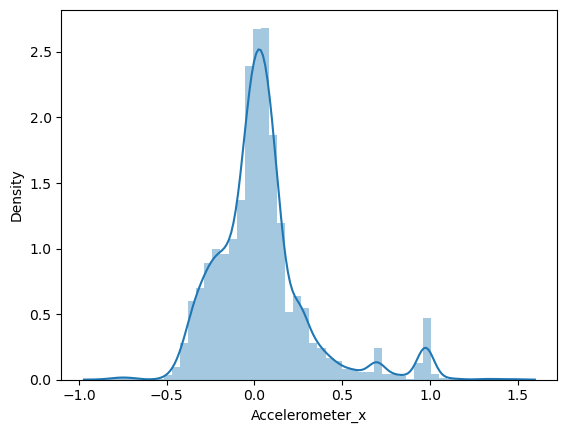

C:\Users\alvin\AppData\Local\Temp\ipykernel_131188\1725523201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


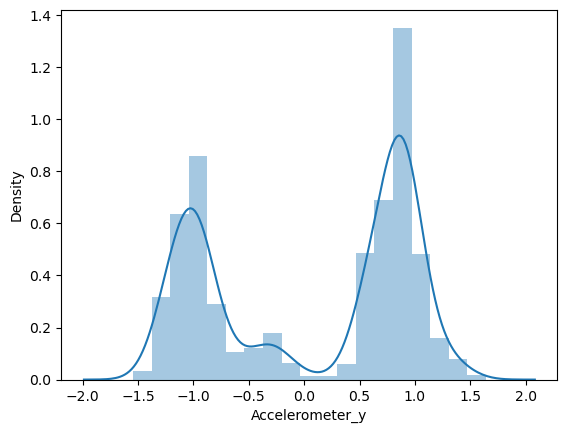

C:\Users\alvin\AppData\Local\Temp\ipykernel_131188\1725523201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


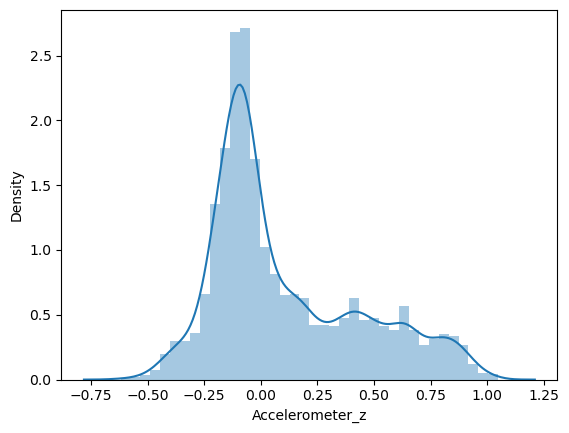

C:\Users\alvin\AppData\Local\Temp\ipykernel_131188\1725523201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


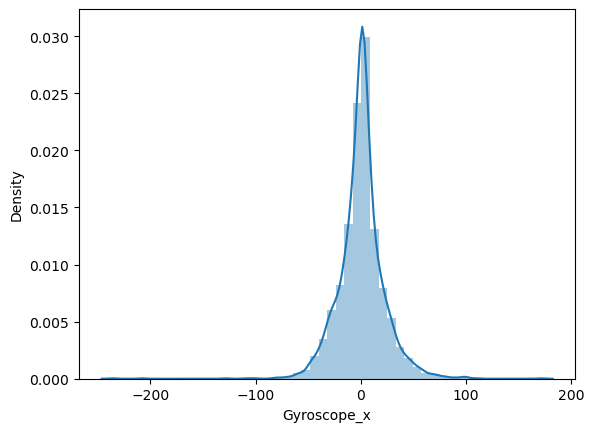

C:\Users\alvin\AppData\Local\Temp\ipykernel_131188\1725523201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


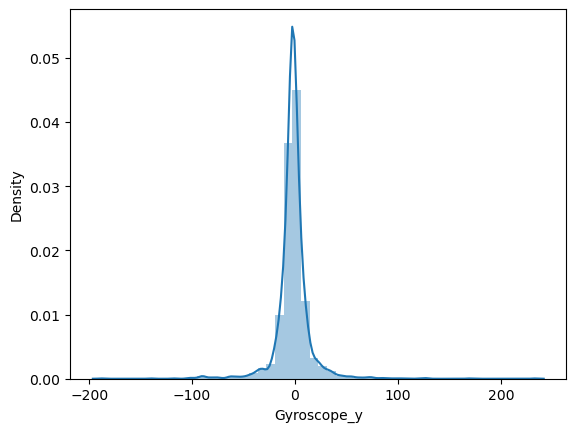

C:\Users\alvin\AppData\Local\Temp\ipykernel_131188\1725523201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


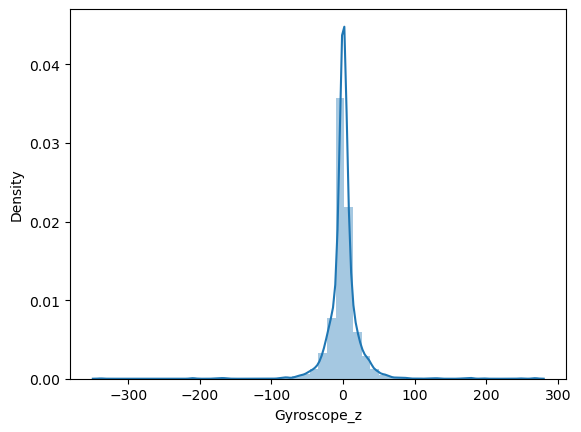

In [111]:
for i in df.columns:
    if df[i].dtype=='float64':
        sns.distplot(df[i])
        plt.show()

In [112]:
X=df.drop(['Label','epoch (ms)'],axis=1)
y=df['Label']

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV    

In [114]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

In [115]:
for train,test in sss.split(X,y):
    X_train,y_train=X.iloc[train],y.iloc[train]
    X_test,y_test=X.iloc[test],y.iloc[test]

In [116]:
print(y_train.value_counts()/y_train.count(),y_test.value_counts()/y_test.count())


Label
ohp      0.186013
bench    0.184745
squat    0.178719
dead     0.169997
row      0.157310
rest     0.123216
Name: count, dtype: float64 Label
ohp      0.186090
bench    0.184980
squat    0.178690
dead     0.169811
row      0.157233
rest     0.123196
Name: count, dtype: float64


In [117]:
est=Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier())])
params = {
    'knn__n_neighbors': range(1, 20), 
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2] 
}

In [118]:
grid_search = GridSearchCV(est, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [119]:
grid_search.best_score_

0.9908022083949675

In [120]:
grid_search.best_params_

{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}

In [121]:
model=grid_search.best_estimator_

In [122]:
pred=model.predict(X_test)


In [123]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,pred),"\n",confusion_matrix(y_test,pred))

0.9940806511283758 
 [[500   0   0   0   0   0]
 [  0 457   0   0   2   0]
 [ 12   0 491   0   0   0]
 [  0   0   0 333   0   0]
 [  0   2   0   0 423   0]
 [  0   0   0   0   0 483]]


In [124]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       bench       0.98      1.00      0.99       500
        dead       1.00      1.00      1.00       459
         ohp       1.00      0.98      0.99       503
        rest       1.00      1.00      1.00       333
         row       1.00      1.00      1.00       425
       squat       1.00      1.00      1.00       483

    accuracy                           0.99      2703
   macro avg       0.99      0.99      0.99      2703
weighted avg       0.99      0.99      0.99      2703



In [126]:
import pickle

In [127]:
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(le,open('le.pkl','wb'))